<a href="https://colab.research.google.com/github/Supathatkh/Supathatkh/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Gold Price Prediction

#Import the libraries and read the Gold ETF data

In [3]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.3 MB/s 
     |████████████████████████████████| 4.0 MB 9.8 MB/s 
     |████████████████████████████████| 128 kB 87.1 MB/s 
     |████████████████████████████████| 112 kB 56.9 MB/s 
     |████████████████████████████████| 62 kB 42.1 MB/s 
     |████████████████████████████████| 110 kB 71.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


First things first: import all the necessary libraries which are required to implement this strategy.

In [4]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# yahoo finance is used to fetch data
import yfinance as yf

Then, we read the past 12 years of daily Gold ETF price data and store it in Df. We remove the columns which are not relevant and drop NaN values using dropna() function. Then, we plot the Gold ETF close price.

[*********************100%***********************]  1 of 1 completed


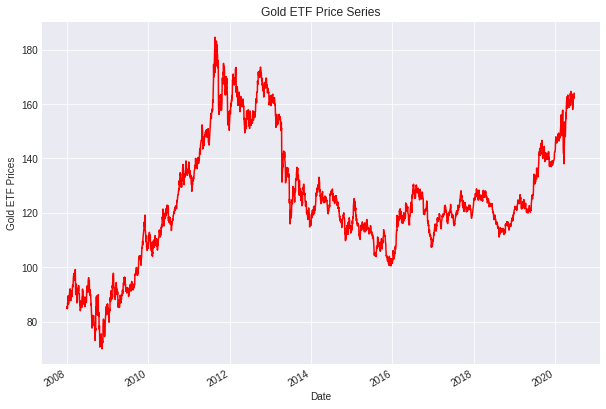

In [5]:
# Read data
Df = yf.download('GLD', '2008-01-01', '2020-6-22', auto_adjust=True)

# Only keep close columns
Df = Df[['Close']]

# Drop rows with missing values
Df = Df.dropna()

# Plot the closing price of GLD
Df.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show()

#Define explanatory variables

An explanatory variable is a variable that is manipulated to determine the value of the Gold ETF price the next day. Simply, they are the features which we want to use to predict the Gold ETF price.

The explanatory variables in this strategy are the moving averages for past 3 days and 9 days. We drop the NaN values using dropna() function and store the feature variables in X.

However, you can add more variables to X which you think are useful to predict the prices of the Gold ETF. These variables can be technical indicators, the price of another ETF such as Gold miners ETF (GDX) or Oil ETF (USO), or US economic data.

##Define dependent variable

Similarly, the dependent variable depends on the values of the explanatory variables. Simply put, it is the Gold ETF price which we are trying to predict. We store the Gold ETF price in y.

In [6]:
# Define explanatory variables
Df['S_3'] = Df['Close'].rolling(window=3).mean()
Df['S_9'] = Df['Close'].rolling(window=9).mean()
Df['next_day_price'] = Df['Close'].shift(-1)

Df = Df.dropna()
X = Df[['S_3', 'S_9']]

# Define dependent variable
y = Df['next_day_price']

#Split the data into train and test dataset

In this step, we split the predictors and output data into train and test data. The training data is used to create the linear regression model, by pairing the input with expected output.

The test data is used to estimate how well the model has been trained.

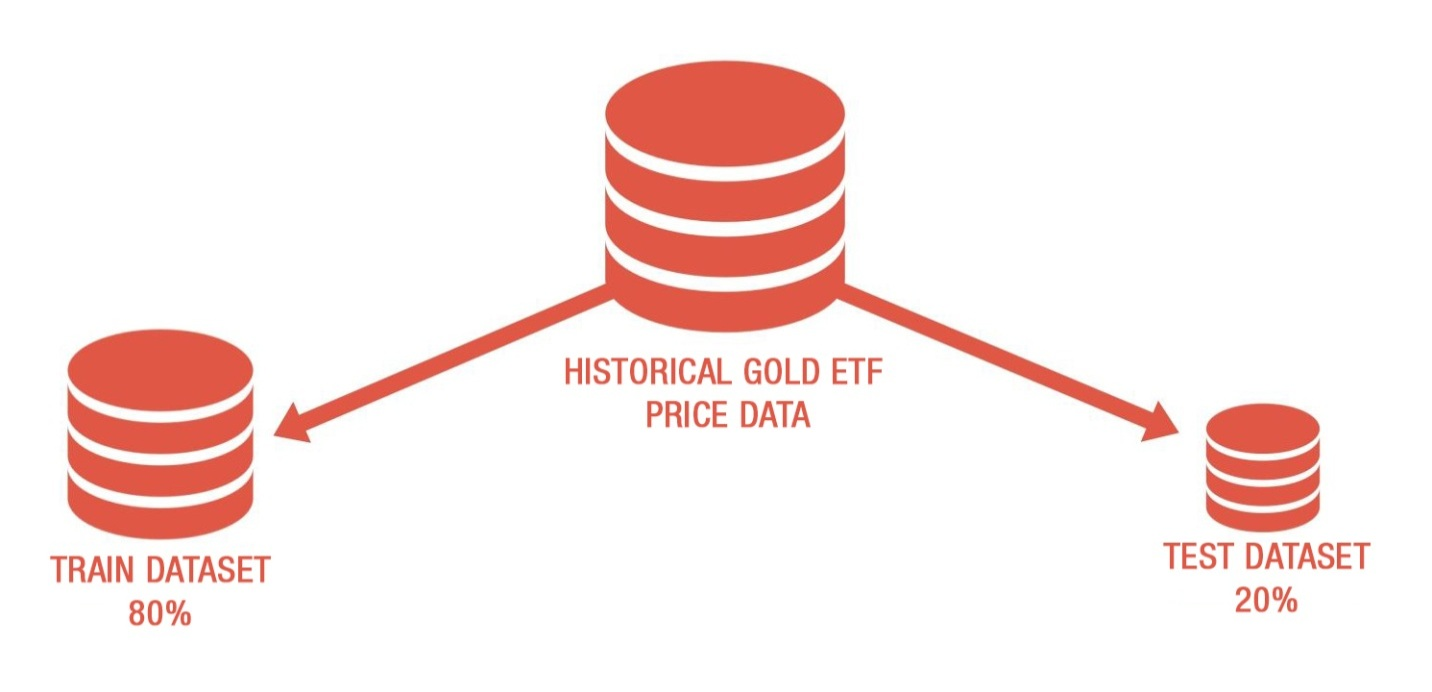

1.   First 80% of the data is used for training and remaining data for testing
2.   X_test & y_test are test dataset

1.   X_test & y_test are test dataset







In [7]:
# Split the data into train and test dataset
t = .8
t = int(t*len(Df))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

#Create a linear regression model

We will now create a linear regression model. But, what is linear regression?

If we try to capture a mathematical relationship between ‘x’ and ‘y’ variables that “best” explains the observed values of ‘y’ in terms of observed values of ‘x’ by fitting a line through a scatter plots then such an equation between x and y is called linear regression analysis.

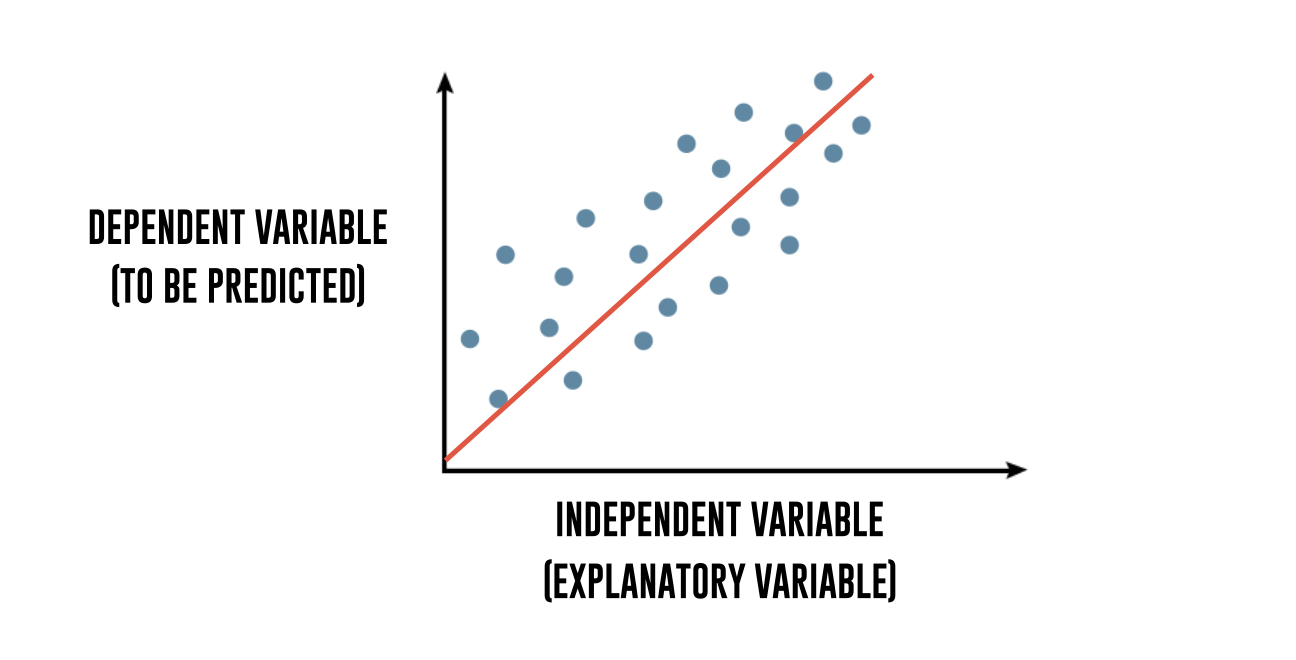

To break it down further, regression explains the variation in a dependent variable in terms of independent variables. The dependent variable - ‘y’ is the variable that you want to predict. The independent variables - ‘x’ are the explanatory variables that you use to predict the dependent variable. The following regression equation describes that relation:

Y = m1 * X1 + m2 * X2 + C
Gold ETF price = m1 * 3 days moving average + m2 * 15 days moving average + c

In [8]:
# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
Gold ETF Price (y) = 1.20 * 3 Days Moving Average (x1) + -0.21 * 9 Days Moving Average (x2) + 0.43 (constant)


#Predict the Gold ETF prices

Now, it’s time to check if the model works in the test dataset. We predict the Gold ETF prices using the linear model created using the train dataset. The predict method finds the Gold ETF price (y) for the given explanatory variable X.

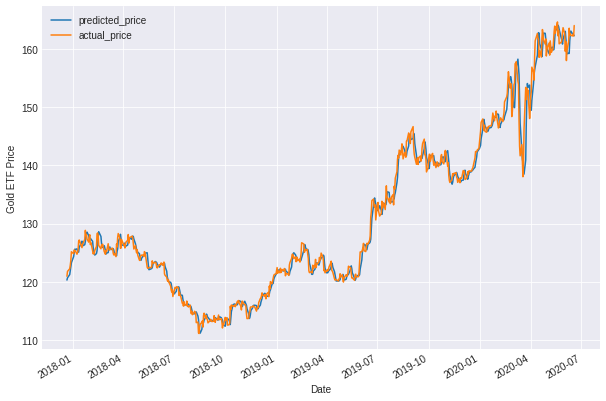

In [9]:
# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

The graph shows the predicted and actual price of the Gold ETF.

Now, let’s compute the goodness of the fit using the score() function.

In [10]:
# R square
r2_score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

98.85

As it can be seen, the R-squared of the model is 99.21%. R-squared is always between 0 and 100%. A score close to 100% indicates that the model explains the Gold ETF prices well.

#Plotting cumulative returns

Let’s calculate the cumulative returns of this strategy to analyse its performance.

1.   The steps to calculate the cumulative returns are as follows:
2.   Generate daily percentage change of gold price

1.   Create a buy trading signal represented by “1” when the next day’s predicted price is more than the current day predicted price. No position is taken otherwise
2.   Calculate the strategy returns by multiplying the daily percentage change with the trading signal.

1.   Finally, we will plot the cumulative returns graph

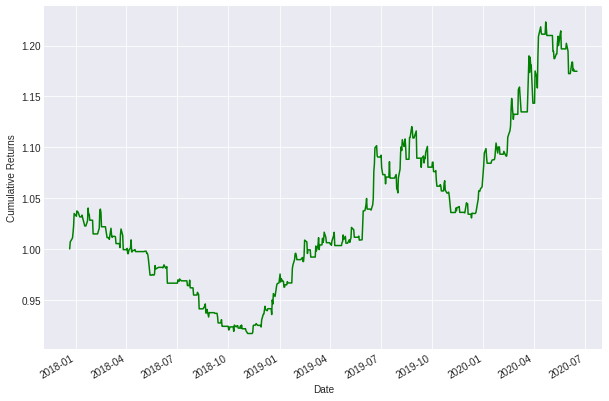

In [11]:
gold = pd.DataFrame()

gold['price'] = Df[t:]['Close']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(-1)

gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)

gold['strategy_returns'] = gold.signal * gold['gold_returns']
((gold['strategy_returns']+1).cumprod()).plot(figsize=(10,7),color='g')
plt.ylabel('Cumulative Returns')
plt.show()

We will also calculate the Sharpe ratio.

In [12]:
# Calculate sharpe ratio
sharpe = gold['strategy_returns'].mean()/gold['strategy_returns'].std()*(252**0.5)
'Sharpe Ratio %.2f' % (sharpe)

'Sharpe Ratio 0.73'

#How to use this model to predict daily moves?

You can use the following code to predict the gold prices and give a trading signal whether we should buy GLD or take no position.

In [13]:
# import datetime and get today's date
import datetime as dt
current_date = dt.datetime.now()

# Get the data
data = yf.download('GLD', '2008-06-01', current_date, auto_adjust=True)
data['S_3'] = data['Close'].rolling(window=3).mean()
data['S_9'] = data['Close'].rolling(window=9).mean()
data = data.dropna()

# Forecast the price
data['predicted_gold_price'] = linear.predict(data[['S_3', 'S_9']])
data['signal'] = np.where(data.predicted_gold_price.shift(1) < data.predicted_gold_price,"Buy","No Position")

# Print the forecast
data.tail(1)[['signal','predicted_gold_price']].T

[*********************100%***********************]  1 of 1 completed


<ipython-input-13-5b97dcdb0a42>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_gold_price'] = linear.predict(data[['S_3', 'S_9']])
<ipython-input-13-5b97dcdb0a42>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signal'] = np.where(data.predicted_gold_price.shift(1) < data.predicted_gold_price,"Buy","No Position")


Date,2022-12-22
signal,Buy
predicted_gold_price,168.272119
